# Video generation
In this notebook we attempt video generation from text prompts. We till use the model [text-to-video-ms-1.7b](https://huggingface.co/ali-vilab/text-to-video-ms-1.7b) which was developed in tandem with this [arxiv paper by Wang et al 2023](https://arxiv.org/abs/2308.06571).

In [1]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
import stackview

First we setup the pipeline for the model.

In [2]:
pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Next, we define the prompt, and can configure the number of frames.

In [3]:
prompt = "A cat running through a park."
result = pipe(prompt, num_inference_steps=25, num_frames=50).frames

C:\Users\rober\miniconda3\envs\genai-gpu\Lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/25 [00:00<?, ?it/s]

The output has this format:

In [4]:
type(result)

numpy.ndarray

In [5]:
result.shape

(1, 50, 256, 256, 3)

Hence, we can convert it to a RGB timelapse:

In [6]:
video_frames = result[0]

The video can be visualized like this:


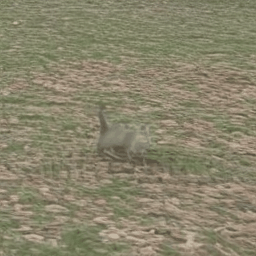

In [7]:
stackview.animate(video_frames*255, frame_delay_ms=200)

We can also store the video, e.g. as mp4 file or animated gif:

In [8]:
export_to_video(video_frames, "video.mp4")

'video.mp4'

In [9]:
stackview.animate(video_frames*255, filename="animation.gif", frame_delay_ms=200);

## Exercise
Increase the number of frames above until the code crashes. What is the limitation here and why is that limitation hard to circumvent?

Also modify the number of inference steps. How does this impact the result quality?

## Exercise
Check the [model page](https://huggingface.co/ali-vilab/text-to-video-ms-1.7b) for the license under which the model is shared. Under which conditions could you reshare the model, e.g. as part of a software application?